## Aufgabe 2 Titanic

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

train_df, valid_df = train_test_split(train_data, test_size=0.2, random_state=42)

### Teilaufgabe a)

#### Analyse

In [16]:
survival_by_class = train_df[['Pclass', 'Survived']]
crosstab_ = pd.crosstab(survival_by_class['Pclass'], survival_by_class['Survived'])
index = [1,2,3]

df = pd.DataFrame(crosstab_, index=index)

df["rate"] = df[1] / (df[1] + df[0])
print(df)

Survived    0   1      rate
1          64  99  0.607362
2          78  73  0.483444
3         302  96  0.241206


#### Plot

([<matplotlib.axis.XTick at 0x7bd60cd60d60>,
 [Text(1, 0, '3. Klasse'), Text(2, 0, '2. Klasse'), Text(3, 0, '1. Klasse')])

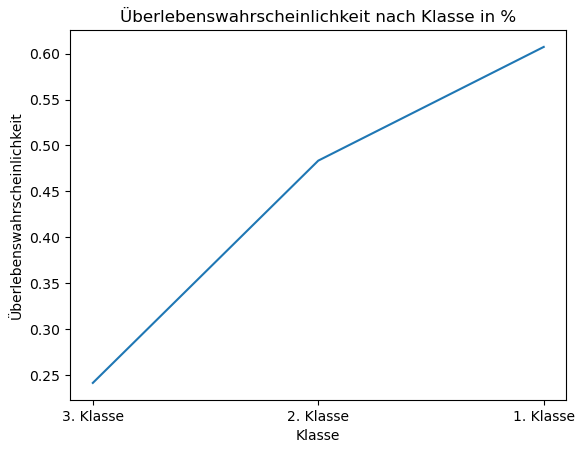

In [17]:

classes = np.array([1,2,3])
survival_prob = np.array(df["rate"])[::-1]
plt.plot(classes, survival_prob)
plt.title("Überlebenswahrscheinlichkeit nach Klasse in %")
plt.xlabel("Klasse")
plt.ylabel("Überlebenswahrscheinlichkeit")
plt.xticks(classes, ['3. Klasse', '2. Klasse', '1. Klasse'])

#### Regel Erstellung

#### Regel anwenden

#### Genauigkeit überprüfen

Accuracy:  0.7039106145251397


### Teilaufgabe b)

Your submission was successfully saved!


#### Genauigkeit der Vorhersage bestimmen

0.6196172248803827


### Teilaufgabe c) Logistische Regression

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
y = train_df['Survived']
x = train_df[['Pclass']]
res = model.fit(x, y)

pred_survived = model.predict(valid_df[['Pclass']])
accuracy = accuracy_score(valid_df['Survived'], pred_survived)
print("Accuracy ", accuracy)

Accuracy  0.7039106145251397


### Teilaufgabe d) Feature Engineering

In [24]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

train_df, valid_df = train_test_split(train_data, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import itertools

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked']

X = train_df
y = train_df['Survived']
valid = valid_df[['Survived']]

print(y)

#y["Age"].fillna(X["Age"].median(skipna=True), inplace=True)
#X.fillna({"Age": X["Age"].median(skipna=True)}, inplace=True)

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
model.fit(X_train[['Sex']], y_train)
pred_survived = model.predict(y_test)
acc = accuracy_score(y_test, pred_survived)


### Test with Test Data

print("Beste Genauigkeit und Feature-Kombination:", acc)
# print("complete: ", results)

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64


KeyError: "None of [Index(['Sex'], dtype='object')] are in the [columns]"

#### Random-Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import itertools

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked']

X = pd.read_csv("./data/train.csv")
y = train_df['Survived']

#y["Age"].fillna(X["Age"].median(skipna=True), inplace=True)
X.fillna({"Age": X["Age"].median(skipna=True)}, inplace=True)

X = pd.get_dummies(X)

features = X.columns
all_combinations = []
for r in range(1, len(features)+1):
    combinations_object = itertools.combinations(features, r)
    combinations_list = list(combinations_object)
    all_combinations += combinations_list


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

for selected in all_combinations:
    x_train_sub = X_train[list(selected)]
    x_test_sub = X_test[list(selected)]

    model = RandomForestClassifier()
    model.fit(x_train_sub, y_train)

    pred_survived = model.predict(x_test_sub)
    acc = accuracy_score(y_test, pred_survived)
    results.append((acc, selected))

best_result = max(results, key=lambda x: x[0])

### Test with Test Data

print("Beste Genauigkeit und Feature-Kombination:", best_result)
print("complete: ", results)

Beste Genauigkeit und Feature-Kombination: (0.8461538461538461, ('Pclass', 'Sex_female', 'Embarked_C'))
complete:  [(0.6153846153846154, ('Pclass',)), (0.6153846153846154, ('Age',)), (0.6083916083916084, ('SibSp',)), (0.8181818181818182, ('Sex_female',)), (0.8181818181818182, ('Sex_male',)), (0.6503496503496503, ('Embarked_C',)), (0.6083916083916084, ('Embarked_Q',)), (0.6083916083916084, ('Embarked_S',)), (0.6433566433566433, ('Pclass', 'Age')), (0.6433566433566433, ('Pclass', 'SibSp')), (0.8321678321678322, ('Pclass', 'Sex_female')), (0.8321678321678322, ('Pclass', 'Sex_male')), (0.6293706293706294, ('Pclass', 'Embarked_C')), (0.6083916083916084, ('Pclass', 'Embarked_Q')), (0.6223776223776224, ('Pclass', 'Embarked_S')), (0.5804195804195804, ('Age', 'SibSp')), (0.7692307692307693, ('Age', 'Sex_female')), (0.7832167832167832, ('Age', 'Sex_male')), (0.6013986013986014, ('Age', 'Embarked_C')), (0.6363636363636364, ('Age', 'Embarked_Q')), (0.6083916083916084, ('Age', 'Embarked_S')), (0.81